#Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_set=pd.read_csv("/content/Google_Stock_Price_Train.csv")
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set=training_set.iloc[:,1:2]
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [4]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
#Getting the inputs and outputs
#xtrain is input and ytrain is output
#for this case, input is stock price at time t and output is stock price at time t+1
X_train=training_set[0:1257] #stock price at time t. doesnt include price at last date
y_train=training_set[1:1258] #stock price at time t+1.
print("Input: ",X_train)
print("Output: ",y_train)

Input:  [[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95163331]
 [0.95725128]
 [0.93796041]]
Output:  [[0.09701243]
 [0.09433366]
 [0.09156187]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [6]:
#Reshaping
#Since the xtrain and ytrain are currently 2D i.e (batch size, input_dim), we have to convert them to keras format which is 3D i.e (batch size,timestamp,input_dim)
X_train=np.reshape(X_train,(1257,1,1))

#Building the RNN(LSTM)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [9]:
#Initialising the RNN
regressor=Sequential()

In [10]:
#Adding the input layer and the LSTM layer
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [11]:
#Adding the putput layer
regressor.add(Dense(units=1))

In [12]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Fitting the RNN to training set
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
40/40 [==============================] - 7s 5ms/step - loss: 0.4764
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.3546
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.2620
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.1935
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.1453
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.1127
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0914
Epoch 8/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0782
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0704
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0657
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0629
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0611
Epoch 13/200
40/40 [=================

#Making Predictions And Visualizing Results

In [14]:
#Getting the real stock price of 2017
test_set=pd.read_csv("/content/Google_Stock_Price_Test.csv")
real_stock_price=test_set.iloc[:,1:2]
real_stock_price

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


In [16]:
#Getting the predicted stock price of 2017
inputs=real_stock_price
inputs=sc.transform(real_stock_price)
inputs=np.reshape(inputs,(20,1,1))
predicted_stock_price=regressor.predict(inputs)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 [==============================] - 0s 18ms/step


array([[772.45264],
       [780.62225],
       [778.6813 ],
       [786.4599 ],
       [795.768  ],
       [796.9772 ],
       [794.60614],
       [796.3811 ],
       [796.66266],
       [796.3315 ],
       [795.2786 ],
       [794.7058 ],
       [796.1907 ],
       [796.4722 ],
       [808.8    ],
       [814.6983 ],
       [821.22107],
       [818.76166],
       [802.57556],
       [787.8057 ]], dtype=float32)

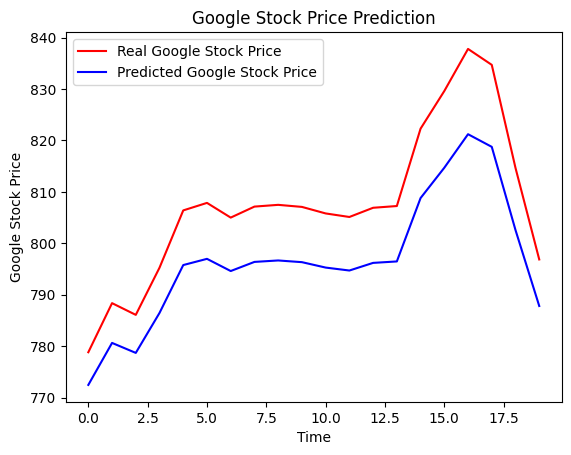

In [18]:
#Visualizing the results
plt.plot(real_stock_price, color='red',label="Real Google Stock Price")
plt.plot(predicted_stock_price, color='blue', label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [25]:
#getting the real stock price of 2012-2016
real_stock_price_train=pd.read_csv("/content/Google_Stock_Price_Train.csv")
real_stock_price_train=real_stock_price_train.iloc[:,1:2]

In [26]:
#Getting the predicted stock price of year 2012-2016
predicted_stock_price_train=regressor.predict(X_train)
predicted_stock_price_train=sc.inverse_transform(predicted_stock_price_train)
predicted_stock_price_train

40/40 [==============================] - 0s 2ms/step


array([[323.971  ],
       [329.75305],
       [328.36743],
       ...,
       [782.5912 ],
       [785.1449 ],
       [776.3323 ]], dtype=float32)

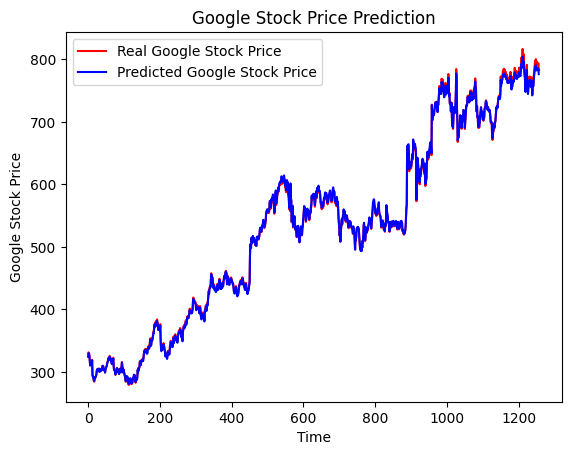

In [27]:
#Visualizing results
plt.plot(real_stock_price_train, color='red',label="Real Google Stock Price")
plt.plot(predicted_stock_price_train, color='blue', label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#Evaluating RNN

In [28]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

In [29]:
print(rmse)

11.2542686674128


In [30]:
rmse/800  #actual stock price values are around 800

0.014067835834266